In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def SwedishPump(b):
    """
    @author: ofersh@telhai.ac.il
    The correlation function, assumes a numpy vector {-1,+1} as input
    """
    n = np.size(b)
    E = []
    for k in range(1, n):
        E.append((b[:n - k].dot(b[k:])) ** 2)
    return (n ** 2) / (2 * sum(E))

In [79]:
def SimulatedAnnealing(n=100, max_evals=1000, variation=lambda x: x + 2.0 * np.random.normal(size=len(x)),
                       func=lambda x: x.dot(x), seed=None):
    """
    @author: ofersh@telhai.ac.il
    """
    T_init = 6.0
    T_min = 1e-4
    alpha = 0.99
    f_lower_bound = 0
    eps_satisfactory = 1e-5
    max_internal_runs = 1000
    local_state = np.random.RandomState(seed)
    history = []
    xbest = xmin = np.random.choice([1, -1], size=n)
    fbest = fmin = func(xmin)
    eval_cntr = 1
    T = T_init
    history.append(fmin)
    while (T > T_min) and eval_cntr < max_evals:
        for _ in range(max_internal_runs):
            x = variation(xmin)
            f_x = func(x)
            eval_cntr += 1
            dE = f_x - fmin
            if dE <= 0 or local_state.uniform(size=1) < np.exp(-dE / T):
                xmin = x
                fmin = f_x
            if fmin < fbest:
                fbest = f_x
                xbest = x
                if fbest < f_lower_bound + eps_satisfactory:
                    T = T_min
                    break
            history.append(fmin)
            # if np.mod(eval_cntr, int(max_evals / 10)) == 0:
            #     print(eval_cntr, " evals: fmin=", fmin)

        T *= alpha
    return xbest, fbest, history

In [80]:
def monte_carlo(n=100, evals=1000, func=SwedishPump):
    """
    @author: ofersh@telhai.ac.il
    """
    X = []
    FX = []
    fmin = 0
    xmin = 0
    f_history = []
    for i in range(evals):
        x = np.random.choice([1, -1], size=n)
        f_x = func(x)
        X.append(x)
        FX.append(f_x)
        if i == 0:
            fmin = f_x
            xmin = x
        else:
            if fmin > f_x:
                fmin = f_x
                xmin = x
        f_history.append(fmin)  # Track the best f(x) at each iteration
    return fmin, xmin, f_history

In [81]:
def Swap_Multiple_Pairs(x, randomness_factor=0.1, seed=None):
    """
    @author: ChatGPT
    Perform multiple controlled swaps between pairs of elements in the input binary vector.
    Args:
    - x (numpy.ndarray): The binary vector to modify.
    - randomness_factor (float): Factor controlling randomness in the number of swaps.
                                  A lower value will reduce randomness.
    - seed (int, optional): A seed for reproducibility.
    Returns:
    - numpy.ndarray: The modified binary vector with swapped elements.
    """
    np.random.seed(seed)  # Fix seed for reproducibility
    x = x.copy()
    num_swaps = int(np.random.randint(1, len(x) // 2) * randomness_factor)  # Control the number of swaps
    for _ in range(num_swaps):
        i, j = np.random.choice(len(x), size=2, replace=False)
        x[i], x[j] = x[j], x[i]
    return x

In [82]:
n = 100
eval = 1000000
alpha = 0.4
func_res = {}
history_dict = {}

In [83]:
fbest = []
xbest = []
history = []  # for ploting

xmin, fmin, h = SimulatedAnnealing(n, eval, Swap_Multiple_Pairs, SwedishPump, seed=17)
fbest.append(fmin)
xbest.append(xmin)
history.append(h)

key = f"alpha {alpha} - evals {eval} - {Swap_Multiple_Pairs.__name__}"
func_res[key] = min(fbest)
history_dict[key] = history  # Store the history for plotting

In [84]:
best_setting = min(func_res, key=func_res.get)
print(f"Best setting is: {best_setting} with value: {func_res[best_setting]}")


Best setting is: alpha 0.4 - evals 1000000 - Swap_Multiple_Pairs with value: 0.025914523535570274


In [85]:
fmin_mc, xmin_mc, f_history_mc = monte_carlo(n, 1000000, SwedishPump)
print(f"Best f(x) found from Monte Carlo is: {fmin_mc}")

Best f(x) found from Monte Carlo is: 0.18169925139908424


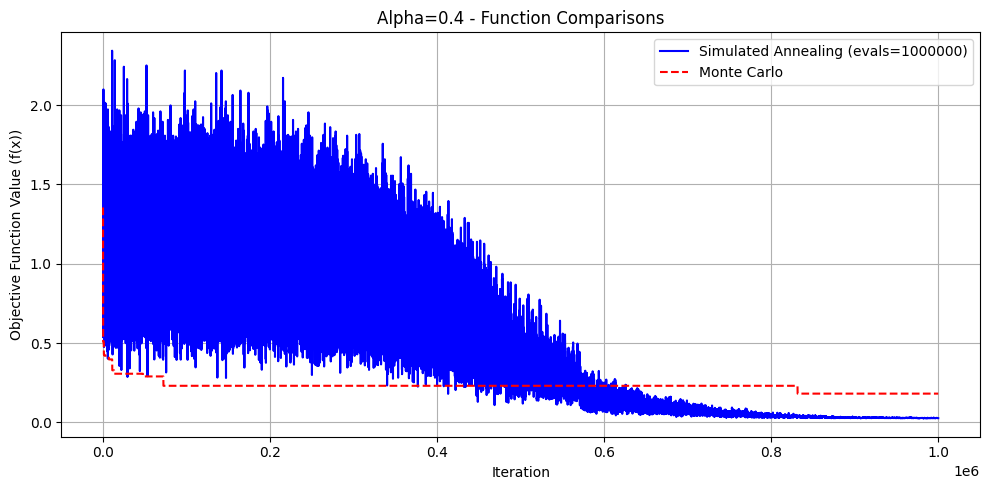

In [86]:
"""
@author: ChatGPT
"""
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Simulated Annealing history
avg_history = np.mean(history, axis=0)
ax.plot(avg_history, label=f"Simulated Annealing (evals={eval})", color='b')

# Plot the Monte Carlo history
ax.plot(f_history_mc, label='Monte Carlo', linestyle='--', color='r')

# Customize the plot
ax.set_title(f"Alpha={alpha} - Function Comparisons")
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Function Value (f(x))')
ax.legend()
ax.grid(True)

# Save the plot
plot_filename = f"plot_{alpha}.png"
fig.savefig(plot_filename, dpi=300)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()